In [3]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('../datasets/smsspamcollection.tsv', sep='\t')
df1.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df2 = pd.read_csv('../datasets/spam_or_not_spam.csv')
df2.head()
# spam 1 

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [5]:
df1.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df2.label.value_counts()

0    2500
1     500
Name: label, dtype: int64

In [7]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [8]:
df1.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
df2.label.value_counts()

0    2500
1     499
Name: label, dtype: int64

In [10]:
del df1['punct']

In [11]:
df1.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [13]:
df2['length'] = df2['email'].apply(lambda x : len(word_tokenize(x)))

In [17]:
df2.head()

,email,label,length
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,257
1,martin a posted tassos papadopoulos the greek ...,0,113
2,man threatens explosion in moscow thursday aug...,0,256
3,klez the virus that won t die already the most...,0,169
4,in adding cream to spaghetti carbonara which ...,0,144


In [18]:
df1.isnull().sum()

label      0
message    0
length     0
dtype: int64

In [19]:
df2.isnull().sum()

email     0
label     0
length    0
dtype: int64

In [20]:
df2 = df2.rename(columns={'email': 'message', 'label': 'label','length' : 'length'})

In [21]:
df1.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df1['label'] = df1['label'].apply(lambda x : 0 if x == "ham" else 1)
df1 = df1[df1['label'] == 1]
df1.label.value_counts()

1    747
Name: label, dtype: int64

In [24]:
frames = [df1, df2]
dataset = pd.concat(frames)

//anaconda3/envs/nlpCourse/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [26]:
dataset.head()

,label,length,message
2,1,155,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,147,FreeMsg Hey there darling it's been 3 week's n...
8,1,157,WINNER!! As a valued network customer you have...
9,1,154,Had your mobile 11 months or more? U R entitle...
11,1,136,"SIX chances to win CASH! From 100 to 20,000 po..."


In [27]:
dataset.label.value_counts()

0    2500
1    1246
Name: label, dtype: int64

In [28]:
len(dataset)

3746

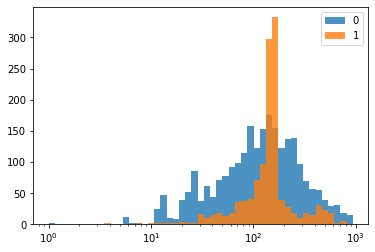

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(dataset[dataset['label']==0]['length'],bins=bins,alpha=0.8)
plt.hist(dataset[dataset['label']==1]['length'],bins=bins,alpha=0.8)
plt.legend(('0','1'))
plt.show()

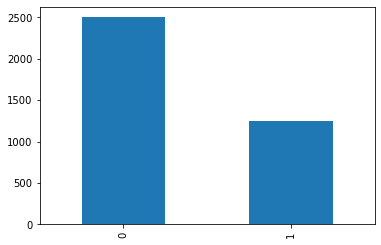

In [30]:
dataset.label.value_counts().plot.bar();

In [32]:
import string
from nltk.corpus import stopwords
import re
print(string.punctuation)
def remove_punctuation_and_stopwords(sms):
    
    no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    no_punctuation = "".join(no_punctuation).split()
    
    liste = " ".join([x.lower() for x in no_punctuation if not x.isdigit()]).split()


    no_punctuation_no_stopwords = \
        [word.lower() for word in liste if word not in stopwords.words("english")]
        
    review = " ".join(no_punctuation_no_stopwords)
    review = re.sub('\s+',' ', review)
    return re.sub(r'\bnumber\b', '', review)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [33]:
print(dataset.head())
dataset['message'] = dataset['message'].apply(lambda x:remove_punctuation_and_stopwords(x))
print(dataset.head())

    label  length                                            message
2       1     155  Free entry in 2 a wkly comp to win FA Cup fina...
5       1     147  FreeMsg Hey there darling it's been 3 week's n...
8       1     157  WINNER!! As a valued network customer you have...
9       1     154  Had your mobile 11 months or more? U R entitle...
11      1     136  SIX chances to win CASH! From 100 to 20,000 po...
    label  length                                            message
2       1     155  free entry wkly comp win fa cup final tkts 21s...
5       1     147  freemsg hey darling weeks word back id like fu...
8       1     157  winner valued network customer selected receiv...
9       1     154  mobile months u r entitled update latest colou...
11      1     136  six chances win cash pounds txt csh11 send cos...


In [34]:
Spams = pd.Series(dataset[dataset['label'] == 1]['message'].tolist()).astype(str)
Hams = pd.Series(dataset[dataset['label'] == 0]['message'].tolist()).astype(str)

In [35]:
from wordcloud import WordCloud

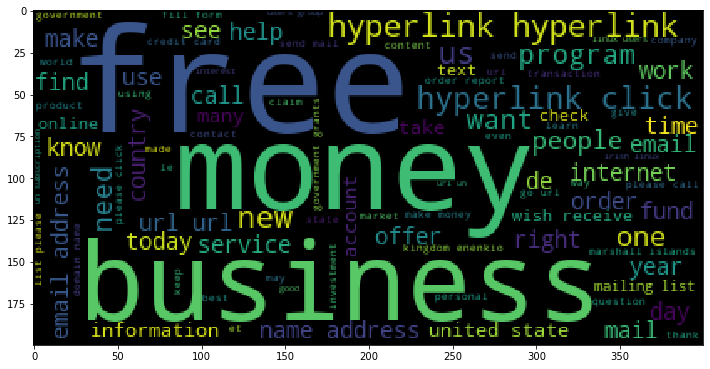

In [36]:
spam_messages_one_string = " ".join(Spams.astype(str))
spam_cloud = WordCloud().generate(spam_messages_one_string)
plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)

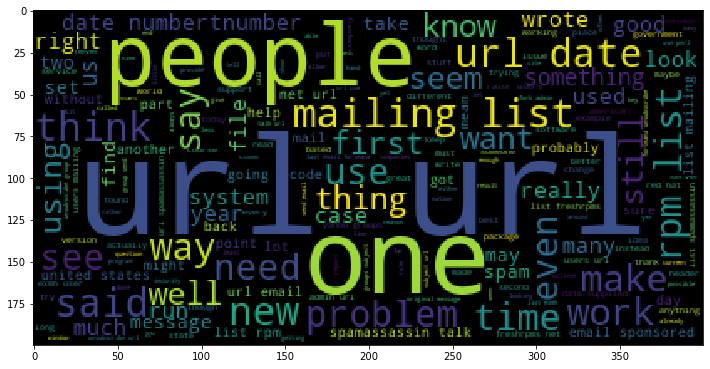

In [53]:
hams_messages_one_string = " ".join(Hams.astype(str))
hams_cloud = WordCloud().generate(hams_messages_one_string)
plt.figure(figsize=(12,8))
plt.imshow(hams_cloud)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(dataset['message'])

In [38]:
print(len(bow_transformer.vocabulary_))

34815


In [39]:
sample = dataset['message'][125]
bow_sample = bow_transformer.transform([sample])
print(sample)
print(bow_sample)

even better url white house president war boner must satisfied president seem hide excitement possible military conflict iraq recent function honoring america war widows bush sported visible erection speech turned subject middle east believe say without help nations without un approval penetrate iraq borders overwhelming force pound iraq without ceasing leaders concede defeat seed iraq american style democracy aides say podium scrubbed thoroughly event special cleanser biocide used since clinton administration yahoo groups sponsor plan sell home url unsubscribe group send email forteana unsubscribe url use yahoo groups subject url
  (0, 719)	1
  (0, 1020)	1
  (0, 1329)	1
  (0, 1331)	1
  (0, 1785)	1
  (0, 2914)	1
  (0, 3033)	1
  (0, 3146)	1
  (0, 3531)	1
  (0, 3596)	1
  (0, 4088)	1
  (0, 4659)	1
  (0, 5210)	1
  (0, 5269)	1
  (0, 5804)	1
  (0, 5921)	1
  (0, 7221)	1
  (0, 7360)	1
  (0, 8770)	1
  (0, 9098)	1
  (0, 9563)	1
  (0, 9766)	1
  (0, 9771)	1
  (0, 9870)	1
  (0, 10995)	1
  :	:
  (0,

In [40]:
print(np.shape(bow_sample))

(1, 34815)


In [41]:
bow_data = bow_transformer.transform(dataset['message'])

In [42]:
bow_data.shape

(3746, 34815)

In [43]:
print( bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]) *100 )

0.20681354476897526


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bow_data)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 33780)	0.1387986658607827
  (0, 33186)	0.18674714584793795
  (0, 33043)	0.13392434476301723
  (0, 32984)	0.09336826111419486
  (0, 32615)	0.157571855671254
  (0, 32303)	0.10731602847730334
  (0, 31781)	0.05985676302605592
  (0, 31780)	0.04479982075684462
  (0, 31759)	0.09567672616938268
  (0, 31576)	0.12815367761161842
  (0, 31192)	0.06826674623749059
  (0, 30933)	0.09012290106535897
  (0, 30040)	0.12436782882001517
  (0, 28893)	0.11090767015335058
  (0, 28869)	0.09336826111419486
  (0, 28298)	0.14576116606912454
  (0, 28281)	0.07912747768888993
  (0, 28199)	0.09460327551209799
  (0, 28161)	0.07272886635496795
  (0, 27461)	0.059690157573854395
  (0, 26920)	0.055197034396849365
  (0, 26892)	0.07947599842637995
  (0, 26847)	0.07261068648262946
  (0, 26836)	0.1220875234569099
  (0, 26715)	0.13883706947731453
  :	:
  (0, 10995)	0.08433014015561452
  (0, 9870)	0.1220875234569099
  (0, 9771)	0.09688358087520325
  (0, 9766)	0.053810556343836115
  (0, 9563)	0.13011373943041996
  (0, 9098

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipe_MNB = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_MNB' , MultinomialNB()),
                    ])

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    
    return acc_sc
def split_data(df):
    X = df['message']
    y = df['label']
    return train_test_split(X,y,test_size = 0.2,random_state = 42)

In [47]:
x_train, x_test, y_train, y_test = split_data(dataset)

In [48]:
pipe_MNB.fit(X=x_train, y=y_train)
pred_test_MNB = pipe_MNB.predict(x_test)
acc_MNB = accuracy_score(y_test, pred_test_MNB)

In [49]:
print(acc_MNB)

0.7933333333333333


In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe_MNB, x_train, y_train, cv=5)
print(np.mean(scores))

0.8000656649972175


In [51]:
confusion_matrix(y_test,pred_test_MNB)
print_validation_report(y_test,pred_test_MNB)

Classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       481
           1       1.00      0.42      0.60       269

    accuracy                           0.79       750
   macro avg       0.88      0.71      0.73       750
weighted avg       0.84      0.79      0.77       750

Accuracy : 0.7933333333333333


0.7933333333333333

In [73]:
from sklearn.ensemble import RandomForestClassifier
pipe_RFC = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_RFC' , RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=8)),
                    ])
pipe_RFC.fit(X=x_train, y=y_train)
pred_test_RFC = pipe_RFC.predict(x_test)
acc_RFC = accuracy_score(y_test, pred_test_RFC)

In [74]:
print(acc_RFC)

0.8373333333333334


In [75]:
scores = cross_val_score(pipe_RFC, x_train, y_train, cv=5)
print(np.mean(scores))

0.8461257651641626


In [76]:
confusion_matrix(y_test,pred_test_RFC)
print_validation_report(y_test,pred_test_RFC)

Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       481
           1       1.00      0.55      0.71       269

    accuracy                           0.84       750
   macro avg       0.90      0.77      0.80       750
weighted avg       0.87      0.84      0.82       750

Accuracy : 0.8373333333333334


0.8373333333333334